# Access satellite imagery

In [2]:
api_url = "https://earth-search.aws.element84.com/v1/"

In [3]:
from pystac_client import Client

In [4]:
client = Client.open(api_url)

In [5]:
client

id: earth-search-aws
title: Earth-Search AWS
description: A STAC API of public datasets on AWS
type: Catalog
"conformsTo: ['https://api.stacspec.org/v1.0.0/core', 'https://api.stacspec.org/v1.0.0/collections', 'https://api.stacspec.org/v1.0.0/ogcapi-features', 'https://api.stacspec.org/v1.0.0/item-search', 'https://api.stacspec.org/v1.0.0-rc.3/ogcapi-features#fields', 'https://api.stacspec.org/v1.0.0-rc.2/ogcapi-features#sort', 'https://api.stacspec.org/v1.0.0-rc.2/ogcapi-features#query', 'https://api.stacspec.org/v1.0.0-rc.3/item-search#fields', 'https://api.stacspec.org/v1.0.0-rc.2/item-search#sort', 'https://api.stacspec.org/v1.0.0-rc.2/item-search#query', 'https://api.stacspec.org/v0.3.0/aggregation', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/oas30', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson']"
id: naip
title: NAIP: National Agriculture Imagery Program
"description: The [National Agriculture Imagery Program](https://www.fsa.usda.gov/programs-and-services/aerial-photography/imagery-programs/naip-imagery/) (NAIP) provides U.S.-wide, high-resolution aerial imagery, with four spectral bands (R, G, B, IR). NAIP is administered by the [Aerial Field Photography Office](https://www.fsa.usda.gov/programs-and-services/aerial-photography/) (AFPO) within the [US Department of Agriculture](https://www.usda.gov/) (USDA). Data are captured at least once every three years for each state. This dataset represents NAIP data from 2010-present, in [cloud-optimized GeoTIFF](https://www.cogeo.org/) format."
"providers: USDA Farm Service Agency (producer, licensor) Esri (processor) AWS (host) Element 84 (processor)"
type: Collection
"item_assets: {'image': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'RGBIR COG tile', 'eo:bands': [{'name': 'Red', 'common_name': 'red'}, {'name': 'Green', 'common_name': 'green'}, {'name': 'Blue', 'common_name': 'blue'}, {'name': 'NIR', 'common_name': 'nir', 'description': 'near-infrared'}]}, 'metadata': {'type': 'text/plain', 'roles': ['metadata'], 'title': 'FGDC Metdata'}}"


In [7]:
for collection in client.get_collections():
    print(collection)

<CollectionClient id=naip>
<CollectionClient id=cop-dem-glo-30>
<CollectionClient id=sentinel-2-l2a>
<CollectionClient id=sentinel-2-l1c>
<CollectionClient id=landsat-c2-l2>
<CollectionClient id=cop-dem-glo-90>
<CollectionClient id=sentinel-1-grd>


In [8]:
client.get_collection?

Signature: client.get_collection(collection_id: str) -> Optional[pystac.collection.Collection]
Docstring:
Get a single collection from this Catalog/API

Args:
    collection_id: The Collection ID to get

Returns:
    CollectionClient: A STAC Collection
File:      /opt/miniconda3/envs/geospatial/lib/python3.10/site-packages/pystac_client/client.py
Type:      method

In [9]:
import sys

In [10]:
sys.prefix

'/opt/miniconda3/envs/geospatial'

In [11]:
collection = "sentinel-2-l2a"

In [12]:
import shapely

In [16]:
from shapely.geometry import Point

In [17]:
point = Point(4.89, 52.37)

In [15]:
# AMS 
point = shapely.Point(4.89, 52.37) # lon, lat

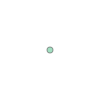

In [14]:
point 

In [18]:
search = client.search(
    collections=[collection],
    intersects=point,
    max_items=10,
)

In [19]:
search.matched()

787

In [20]:
# get metadata for the matching scenes
items = search.get_all_items()

In [21]:
items

id: S2B_31UFU_20230507_0_L2A
"bbox: [4.809286768997858, 52.22257539160585, 6.141754296879459, 53.2286930931997]"
created: 2023-05-07T16:51:24.071Z
platform: sentinel-2b
constellation: sentinel-2
instruments: ['msi']
eo:cloud_cover: 80.801338
proj:epsg: 32631
mgrs:utm_zone: 31
mgrs:latitude_band: U
mgrs:grid_square: FU


In [22]:
type(items)

pystac.item_collection.ItemCollection

In [23]:
len(items)

10

In [24]:
for item in items:
    print(item)

<Item id=S2B_31UFU_20230507_0_L2A>
<Item id=S2A_31UFU_20230505_0_L2A>
<Item id=S2A_31UFU_20230502_0_L2A>
<Item id=S2B_31UFU_20230430_0_L2A>
<Item id=S2B_31UFU_20230427_0_L2A>
<Item id=S2A_31UFU_20230425_0_L2A>
<Item id=S2A_31UFU_20230422_0_L2A>
<Item id=S2B_31UFU_20230417_0_L2A>
<Item id=S2A_31UFU_20230415_0_L2A>
<Item id=S2A_31UFU_20230412_0_L2A>


In [27]:
item = items[0]

In [28]:
item.datetime

datetime.datetime(2023, 5, 7, 10, 46, 28, 289000, tzinfo=tzutc())

In [29]:
item.geometry

{'type': 'Polygon',
 'coordinates': [[[5.233295402525498, 53.2286930931997],
   [6.141754296879459, 53.20819279121764],
   [6.071664488869862, 52.22257539160585],
   [4.809286768997858, 52.24869018129883],
   [5.233295402525498, 53.2286930931997]]]}

In [30]:
item.properties

{'created': '2023-05-07T16:51:24.071Z',
 'platform': 'sentinel-2b',
 'constellation': 'sentinel-2',
 'instruments': ['msi'],
 'eo:cloud_cover': 80.801338,
 'proj:epsg': 32631,
 'mgrs:utm_zone': 31,
 'mgrs:latitude_band': 'U',
 'mgrs:grid_square': 'FU',
 'grid:code': 'MGRS-31UFU',
 'view:sun_azimuth': 160.397737175461,
 'view:sun_elevation': 52.808151116774,
 's2:degraded_msi_data_percentage': 0.016,
 's2:nodata_pixel_percentage': 32.954207,
 's2:saturated_defective_pixel_percentage': 0,
 's2:dark_features_percentage': 0,
 's2:cloud_shadow_percentage': 0.846184,
 's2:vegetation_percentage': 4.272007,
 's2:not_vegetated_percentage': 1.690566,
 's2:water_percentage': 10.552445,
 's2:unclassified_percentage': 1.837466,
 's2:medium_proba_clouds_percentage': 28.334308,
 's2:high_proba_clouds_percentage': 27.100337,
 's2:thin_cirrus_percentage': 25.366694,
 's2:snow_ice_percentage': 0,
 's2:product_type': 'S2MSI2A',
 's2:processing_baseline': '05.09',
 's2:product_uri': 'S2B_MSIL2A_20230507T1

In [31]:
# a bit more advanced search

In [34]:
bbox = point.buffer(0.01).bounds

In [35]:
datetime = "2020-03-20/2020-03-30"

In [36]:
query = "eo:cloud_cover<15"

In [37]:
search = client.search(
    collections=[collection],
    bbox=bbox,
    datetime=datetime,
    query=[query],
)

In [38]:
search.matched()

4

In [39]:
items = search.get_all_items()

In [40]:
items

id: S2A_31UFU_20200328_0_L2A
"bbox: [4.814996623122647, 52.22257539160585, 6.141754296879459, 53.228577890548]"
created: 2022-11-06T06:14:59.218Z
platform: sentinel-2a
constellation: sentinel-2
instruments: ['msi']
eo:cloud_cover: 10.348317
proj:epsg: 32631
mgrs:utm_zone: 31
mgrs:latitude_band: U
mgrs:grid_square: FU


In [41]:
items.save_object("search.json")

## Acces the assets

In [42]:
item = items[0]

In [43]:
item.assets

{'aot': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/AOT.tif>,
 'blue': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B02.tif>,
 'coastal': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B01.tif>,
 'granule_metadata': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/granule_metadata.xml>,
 'green': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B03.tif>,
 'nir': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B08.tif>,
 'nir08': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0

In [45]:
item.assets.keys()

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])

In [46]:
assets = item.assets

In [48]:
for key, asset in assets.items():
    print(key, ":",  asset.title)

aot : Aerosol optical thickness (AOT)
blue : Blue (band 2) - 10m
coastal : Coastal aerosol (band 1) - 60m
granule_metadata : None
green : Green (band 3) - 10m
nir : NIR 1 (band 8) - 10m
nir08 : NIR 2 (band 8A) - 20m
nir09 : NIR 3 (band 9) - 60m
red : Red (band 4) - 10m
rededge1 : Red edge 1 (band 5) - 20m
rededge2 : Red edge 2 (band 6) - 20m
rededge3 : Red edge 3 (band 7) - 20m
scl : Scene classification map (SCL)
swir16 : SWIR 1 (band 11) - 20m
swir22 : SWIR 2 (band 12) - 20m
thumbnail : Thumbnail image
tileinfo_metadata : None
visual : True color image
wvp : Water vapour (WVP)
aot-jp2 : Aerosol optical thickness (AOT)
blue-jp2 : Blue (band 2) - 10m
coastal-jp2 : Coastal aerosol (band 1) - 60m
green-jp2 : Green (band 3) - 10m
nir-jp2 : NIR 1 (band 8) - 10m
nir08-jp2 : NIR 2 (band 8A) - 20m
nir09-jp2 : NIR 3 (band 9) - 60m
red-jp2 : Red (band 4) - 10m
rededge1-jp2 : Red edge 1 (band 5) - 20m
rededge2-jp2 : Red edge 2 (band 6) - 20m
rededge3-jp2 : Red edge 3 (band 7) - 20m
scl-jp2 : Sce

In [51]:
assets["thumbnail"].href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/thumbnail.jpg'

In [55]:
coastal_href = assets["coastal"].href

In [53]:
import rioxarray

In [56]:
coastal = rioxarray.open_rasterio(coastal_href)

In [57]:
coastal

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

#### Exercise: Search Landsat 8 scenes on the Microsoft Planetary Computer
In this exercise we put in practice all the skills we have learned in this episode to search for images from [the Landsat program](https://landsat.gsfc.nasa.gov). In particular, we look for scenes from the [Landsat 8 mission](https://www.usgs.gov/landsat-missions/landsat-8), as hosted on the [Microsoft Planetary Computer](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2). This collection can be accessed from the Planetary Computer STAC API endpoint at the following URL: https://planetarycomputer.microsoft.com/api/stac/v1

- Using `pystac_client`, search for all assets of the Landsat 8 collection (`landsat-8-c2-l2`) from February to March 2021, intersecting the point with longitude/latitute coordinates (-73.97, 40.78) deg, and with a cloud cover percentage smaller than 10.
- Visualize the item’s thumbnail (asset key `rendered_preview`).


In [58]:
pc_stac_url = "https://planetarycomputer.microsoft.com/api/stac/v1"

In [59]:
pc_client = Client.open(pc_stac_url)

In [60]:
for collection in pc_client.get_collections():
    print(collection)

<CollectionClient id=daymet-annual-pr>
<CollectionClient id=daymet-daily-hi>
<CollectionClient id=3dep-seamless>
<CollectionClient id=3dep-lidar-dsm>
<CollectionClient id=fia>
<CollectionClient id=sentinel-1-rtc>
<CollectionClient id=gridmet>
<CollectionClient id=daymet-annual-na>
<CollectionClient id=daymet-monthly-na>
<CollectionClient id=daymet-annual-hi>
<CollectionClient id=daymet-monthly-hi>
<CollectionClient id=daymet-monthly-pr>
<CollectionClient id=gnatsgo-tables>
<CollectionClient id=hgb>
<CollectionClient id=cop-dem-glo-30>
<CollectionClient id=cop-dem-glo-90>
<CollectionClient id=goes-cmi>
<CollectionClient id=terraclimate>
<CollectionClient id=nasa-nex-gddp-cmip6>
<CollectionClient id=gpm-imerg-hhr>
<CollectionClient id=gnatsgo-rasters>
<CollectionClient id=3dep-lidar-hag>
<CollectionClient id=3dep-lidar-intensity>
<CollectionClient id=3dep-lidar-pointsourceid>
<CollectionClient id=mtbs>
<CollectionClient id=landsat-8-c2-l2>
<CollectionClient id=noaa-c-cap>
<CollectionClie

In [61]:
collection = "landsat-8-c2-l2"

In [62]:
datetime = "2021-02-01/2021-03-30"

In [63]:
point = Point(-73.97, 40.78)

In [64]:
query = "eo:cloud_cover<10"

In [65]:
search = pc_client.search(
    collections=[collection],
    datetime=datetime,
    intersects=point,
    query=[query],
)

In [68]:
search.matched()

In [67]:
pc_client

id: microsoft-pc
title: Microsoft Planetary Computer STAC API
description: Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer
type: Catalog
"conformsTo: ['http://www.opengis.net/spec/cql2/1.0/conf/basic-cql2', 'http://www.opengis.net/spec/cql2/1.0/conf/cql2-json', 'http://www.opengis.net/spec/cql2/1.0/conf/cql2-text', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/oas30', 'http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/filter', 'https://api.stacspec.org/v1.0.0-rc.1/collections', 'https://api.stacspec.org/v1.0.0-rc.1/core', 'https://api.stacspec.org/v1.0.0-rc.1/item-search', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#fields', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#filter', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#query', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#sort', 'https://api.stacspec.org/v1.0.0-rc.1/ogcapi-features']"
id: daymet-annual-pr
title: Daymet Annual Puerto Rico
"description: Annual climate summaries derived from [Daymet](https://daymet.ornl.gov) Version 4 daily data at a 1 km x 1 km spatial resolution for five variables: minimum and maximum temperature, precipitation, vapor pressure, and snow water equivalent. Annual averages are provided for minimum and maximum temperature, vapor pressure, and snow water equivalent, and annual totals are provided for the precipitation variable. [Daymet](https://daymet.ornl.gov/) provides measurements of near-surface meteorological conditions; the main purpose is to provide data estimates where no instrumentation exists. The dataset covers the period from January 1, 1980 to the present. Each year is processed individually at the close of a calendar year. Data are in a Lambert conformal conic projection for North America and are distributed in Zarr and NetCDF formats, compliant with the [Climate and Forecast (CF) metadata conventions (version 1.6)](http://cfconventions.org/). Use the DOI at [https://doi.org/10.3334/ORNLDAAC/1852](https://doi.org/10.3334/ORNLDAAC/1852) to cite your usage of the data. This dataset provides coverage for Hawaii; North America and Puerto Rico are provided in [separate datasets](https://planetarycomputer.microsoft.com/dataset/group/daymet#annual)."
"providers: Microsoft (host, processor) ORNL DAAC (producer)"
type: Collection
sci:doi: 10.3334/ORNLDAAC/1852


In [69]:
pc_items = search.get_all_items()

In [71]:
assets = pc_items[0].assets 

In [74]:
assets["rendered_preview"].href

'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=landsat-8-c2-l2&item=LC08_L2SP_013032_20210208_02_T1&assets=SR_B4&assets=SR_B3&assets=SR_B2&color_formula=gamma+RGB+2.7%2C+saturation+1.5%2C+sigmoidal+RGB+15+0.55&format=png'

In [75]:
assets

{'ANG': <Asset href=https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2021/013/032/LC08_L2SP_013032_20210208_20210302_02_T1/LC08_L2SP_013032_20210208_20210302_02_T1_ANG.txt>,
 'SR_B1': <Asset href=https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2021/013/032/LC08_L2SP_013032_20210208_20210302_02_T1/LC08_L2SP_013032_20210208_20210302_02_T1_SR_B1.TIF>,
 'SR_B2': <Asset href=https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2021/013/032/LC08_L2SP_013032_20210208_20210302_02_T1/LC08_L2SP_013032_20210208_20210302_02_T1_SR_B2.TIF>,
 'SR_B3': <Asset href=https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2021/013/032/LC08_L2SP_013032_20210208_20210302_02_T1/LC08_L2SP_013032_20210208_20210302_02_T1_SR_B3.TIF>,
 'SR_B4': <Asset href=https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2021/013/032/LC08_L2SP_013032_20210208_20210302_02_T1/LC08_L2